In [1]:
import linecache
import numpy as np
filename='../CACL2.UMBRELLA/npt.gro'

def calc_dist(coord1, coord2):
 dx, dy, dz = (coord1[0]-coord2[0]),(coord1[1]-coord2[1]),(coord1[2]-coord2[2])
 dist = np.sqrt(dx**2+dy**2+dz**2)
 return dist

na_list = []
cl_list = []
for i in range(3,32925):
 line =linecache.getline(filename, i)
 atomtype=line[5:8]
 if atomtype=='CL ':
  (num, x, y, z) = (int(line[15:20]),float(line[20:28]), float(line[28:36]), float(line[36:44]))
  cl_list.append((num,x,y,z))
 if atomtype=='CAL':
  (num, x, y, z) = (int(line[15:20]),float(line[20:28]), float(line[28:36]), float(line[36:44]))
  na_list.append((num,x,y,z))
  
cl_array = np.array(cl_list, dtype=[('num', int), ('x', float), ('y', float), ('z', float)])
na_array = np.array(na_list, dtype=[('num', int), ('x', float), ('y', float), ('z', float)])

pairlist = []
#print(na_array)
for item in na_list:
 coord1 = (item[1], item[2], item[3])
 for item2 in cl_list:
  coord2 = (item2[1], item2[2], item2[3])
  dist = calc_dist(coord1, coord2)
  if dist <=0.4:
   num = (item[0], item2[0])
   pairlist.append((num, dist))
  else:
   continue
print(pairlist)

#print(len(cl_list))

[((31903, 32187), 0.24948747463550125), ((31912, 32199), 0.2583969814065173), ((31930, 32181), 0.27150874755705456), ((31939, 32176), 0.2577537584595035), ((31950, 32241), 0.26566520283996564), ((31966, 32320), 0.26381243336886157), ((31967, 32319), 0.2596324324887012), ((31973, 32327), 0.25773823930491974), ((31973, 32328), 0.26193701533002156), ((31986, 32437), 0.25980184756848873), ((31996, 32305), 0.26538651058409113), ((32028, 32399), 0.2685628418080212), ((32043, 32427), 0.266970035771807), ((32047, 32435), 0.26989998147461985), ((32051, 32388), 0.2500619923139058), ((32082, 32165), 0.35397316282452845)]


# Analysis

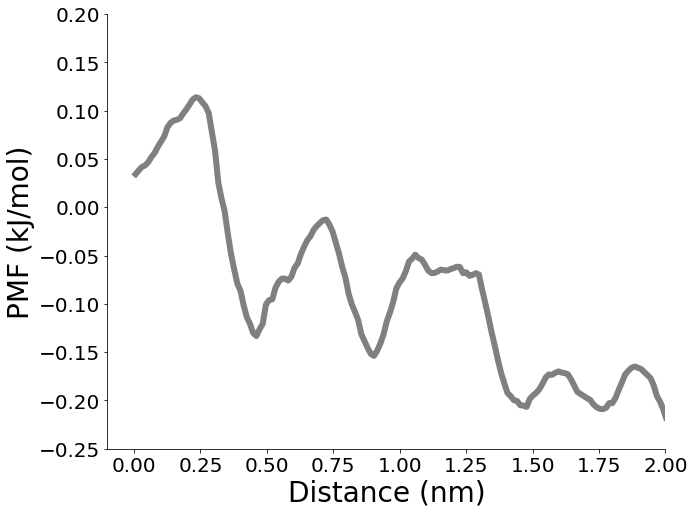

In [7]:
import matplotlib.pyplot as plt
inp_file = 'profile.xvg'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

def smooth_data(data, window_size=15):
    if window_size < 10:
        raise ValueError("Window size must be at least 3 for smoothing.")
    window = np.ones(int(window_size))/float(window_size)
    smoothed_data = np.convolve(data, window, 'same')
    return smoothed_data

data = np.loadtxt(inp_file, skiprows=17)
x = data[:,0]
y = data[:,1]
ysm = smooth_data(y)
ax.plot(x, ysm, linewidth = 6, color = 'gray')
ax.set_xlim(-0.1, 2.0)
ax.set_ylim(-0.25, 0.2)
ax.set_xlabel('Distance (nm)', fontsize=28)
ax.set_ylabel('PMF (kJ/mol)', fontsize=28)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=20)
spines_to_remove = ['top', 'right']
for spine in spines_to_remove:
 ax.spines[spine].set_visible(False)
 
fig_folder = '/trajectories/gargi/MUC2/FIGURES.REPO/CALIBRATION/CALIBRATION.TRIAL/'
fig.savefig(fig_folder+'Ca_Cl_PMF.png', dpi=300, bbox_inches='tight')